In [2]:
#Import the modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
#Load the data and print it
heart =  'assignment04.csv.txt'
df = pd.read_csv(heart, encoding='utf-16', sep='\t')
print(df)
#################################################
# extract numeric and categorical parameters
numeric_columns = ['chol', 'thalach', 'age', 'trestbps', 'oldpeak']
categorical_columns = [col for col in df.columns if col not in numeric_columns]
print(categorical_columns)
# count of target variable
df.target.value_counts()

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
5     57    1   0       140   192    0        1      148      0      0.4   
6     56    0   1       140   294    0        0      153      0      1.3   
7     44    1   1       120   263    0        1      173      0      0.0   
8     52    1   2       172   199    1        1      162      0      0.5   
9     57    1   2       150   168    0        1      174      0      1.6   
10    54    1   0       140   239    0        1      160      0      1.2   
11    48    0   2       130   275    0        1      139      0      0.2   
12    49    

1    165
0    138
Name: target, dtype: int64

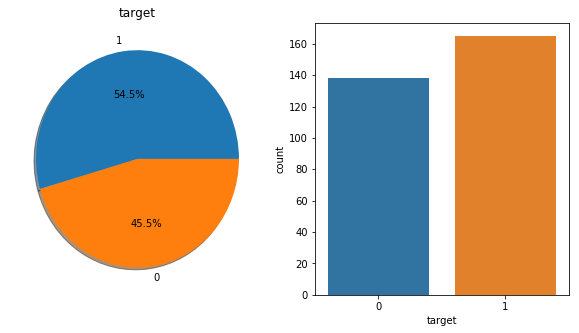

,chol,thalach,age,trestbps,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,246.264026,149.646865,54.366337,131.623762,1.039604
std,51.830751,22.905161,9.082101,17.538143,1.161075
min,126.000000,71.000000,29.000000,94.000000,0.000000
25%,211.000000,133.500000,47.500000,120.000000,0.000000
50%,240.000000,153.000000,55.000000,130.000000,0.800000
75%,274.500000,166.000000,61.000000,140.000000,1.600000
max,564.000000,202.000000,77.000000,200.000000,6.200000


In [3]:
f, ax = plt.subplots(1,2,figsize=(10,5))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target', data=df, ax=ax[1])
plt.show()
# Describe
df[numeric_columns].describe()

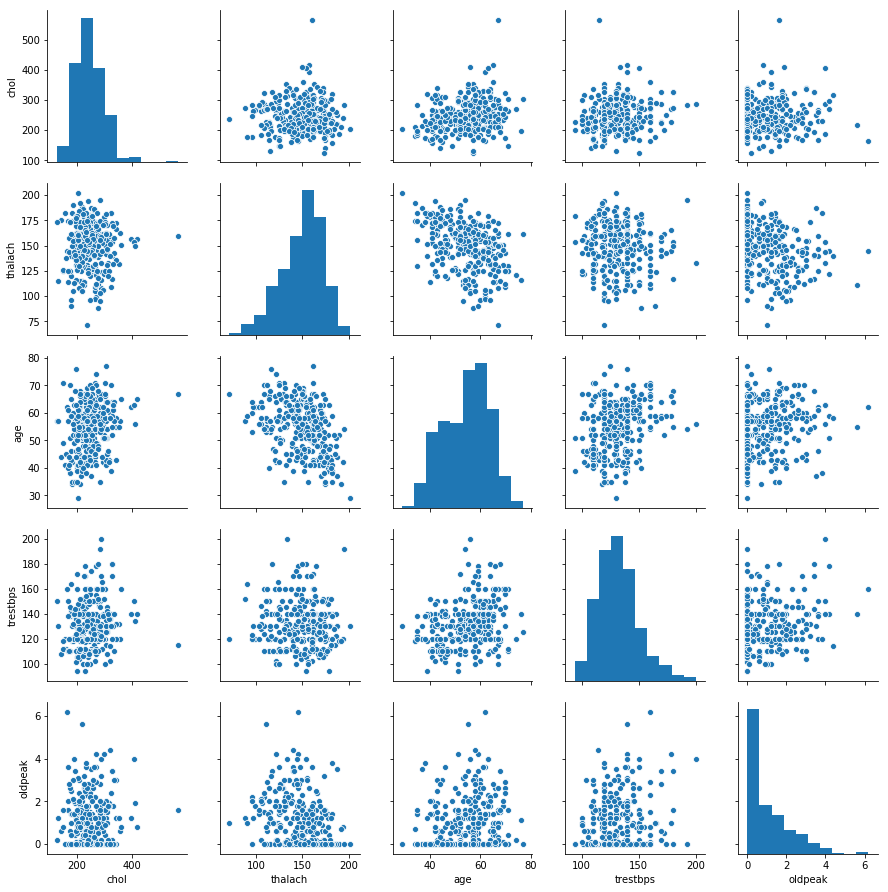

In [4]:
# plot all numerical
sns.pairplot(df[numeric_columns])
plt.show()

              chol   thalach       age  trestbps   oldpeak
chol      1.000000 -0.009940  0.213678  0.123174  0.053952
thalach  -0.009940  1.000000 -0.398522 -0.046698 -0.344187
age       0.213678 -0.398522  1.000000  0.279351  0.210013
trestbps  0.123174 -0.046698  0.279351  1.000000  0.193216
oldpeak   0.053952 -0.344187  0.210013  0.193216  1.000000


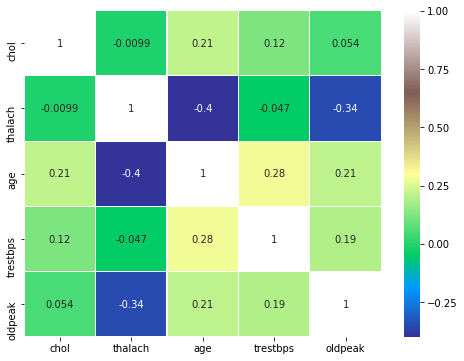

In [5]:
# find the correlation
print(df[numeric_columns].corr())
sns.heatmap(df[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

C:\Users\farzad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


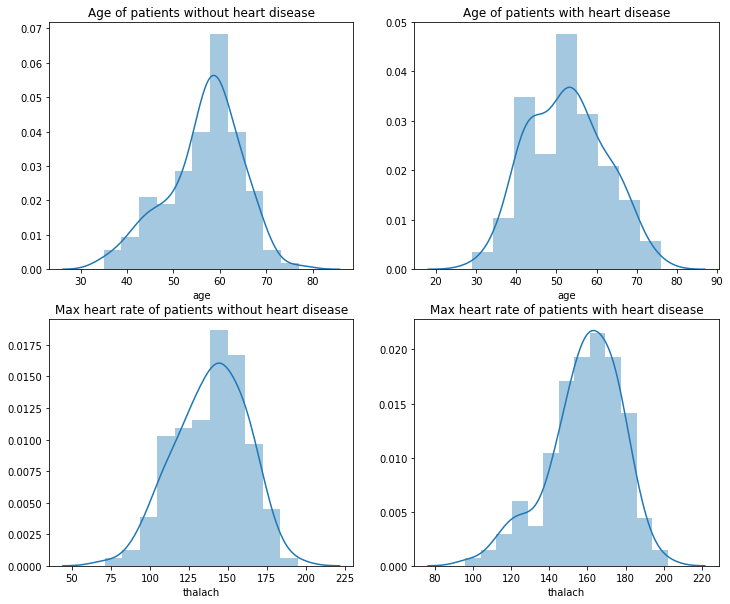

In [6]:
# plot age and thalach
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max heart rate of patients with heart disease')
plt.show()

In [7]:
# number by gender
df.groupby(['sex','target'])['target'].count()

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64

In [8]:
# data for ca
df[['ca','target']].groupby('ca').mean()

,target
ca,
0,0.742857
1,0.323077
2,0.184211
3,0.150000
4,0.800000


C:\Users\farzad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


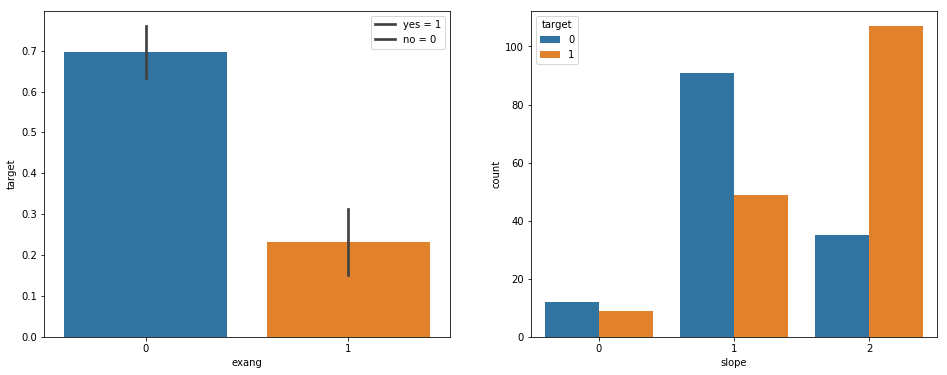

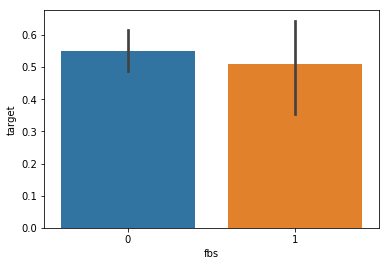

In [10]:
# plot other variables
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.barplot(x="exang", y="target", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(122)
sns.countplot(x="slope", hue='target', data=df)
plt.show()
sns.barplot(x="fbs", y="target", data=df)

In [11]:
#target variable is y
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape)
print(y.shape)

(303, 13)
(303,)


In [12]:
# train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)

In [13]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

Train accuracy: 100.00%
Test accuracy: 70.33%


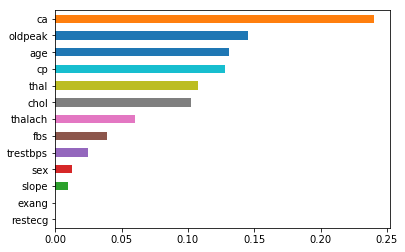

In [14]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, random_state=2606)

# feature importances
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [15]:
# Check optimal 'max_depth' parameter
for i in range(1,8):
    print("max_depth = "+str(i))
    train_model(X_train, y_train, X_test, y_test, DecisionTreeClassifier, max_depth=i, random_state=2606, min_samples_leaf=1, min_impurity_decrease=0.0, min_weight_fraction_leaf=0.0, splitter='best')
#Based on below results maxdepth=2 and 3 gives an optimal result 

max_depth = 1
Train accuracy: 74.06%
Test accuracy: 72.53%
max_depth = 2
Train accuracy: 77.83%
Test accuracy: 84.62%
max_depth = 3
Train accuracy: 84.43%
Test accuracy: 81.32%
max_depth = 4
Train accuracy: 87.74%
Test accuracy: 73.63%
max_depth = 5
Train accuracy: 90.57%
Test accuracy: 65.93%
max_depth = 6
Train accuracy: 93.40%
Test accuracy: 64.84%
max_depth = 7
Train accuracy: 97.17%
Test accuracy: 72.53%


C:\Users\farzad\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Train accuracy: 97.64%
Test accuracy: 89.01%


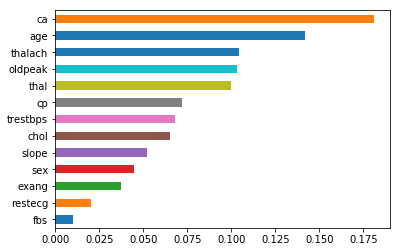

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

In [17]:
# Random Forest changing n
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=45, random_state=2606)

Train accuracy: 100.00%
Test accuracy: 94.51%


In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier(max_depth=3, random_state=2606, min_samples_leaf=1, min_impurity_decrease=0.0, min_weight_fraction_leaf=0.0, splitter='best')
model.fit(X_train, y_train)
model.score(X_train, y_train)

%matplotlib inline
from sklearn.tree import export_graphviz
export_graphviz(model, 
                out_file = "model_tree.dot", 
                feature_names = X.columns)

with open("model_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Use dot file to create a graph
import pydot
(graph, ) = pydot.graph_from_dot_file('model_tree.dot')

# Write graph to a png file
graph.write_png('dectree.png')

In [19]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[28 13]
 [ 4 46]]


In [20]:
#Visualize random forest
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=45, random_state=2606)
model.fit(X_train, y_train)
model.score(X_train, y_train)

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = model.estimators_[13]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = model.estimators_[13]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

#Limit the depth of the three
#Visualize random forest
model_small = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=45, max_depth=3, random_state=2606)
model_small.fit(X_train, y_train)
model_small.score(X_train, y_train)

# Extract the small tree
tree_small = model_small.estimators_[13]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X.columns, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

from sklearn.metrics import confusion_matrix
y_pred=model_small.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

from sklearn.metrics import classification_report
target=['Healthy','Sick']
print(classification_report(y_test, y_pred, target_names=target))

Train accuracy: 100.00%
Test accuracy: 94.51%
Train accuracy: 85.85%
Test accuracy: 95.60%
[[38  3]
 [ 1 49]]
             precision    recall  f1-score   support

    Healthy       0.97      0.93      0.95        41
       Sick       0.94      0.98      0.96        50

avg / total       0.96      0.96      0.96        91

